In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

path = '/home/hermuba/data0118/network1122/'

string = nx.read_edgelist(path + 'string_edgelist', delimiter = ',', nodetype = str,)
refseq_net = nx.read_edgelist(path + 'refseq_ordinary_40_edgelist', delimiter = ',', nodetype = str,)
eskape_net = nx.read_edgelist(path + 'eskape_mu_high.csv_edgelist', delimiter = ',', nodetype = str,)
domain =  nx.read_edgelist(path + 'domain_edgelist', nodetype = str,)


In [15]:
def add_edge_tag(G, G_name):
    
    nx.set_edge_attributes(G, True, G_name)
    

In [16]:
add_edge_tag(domain, 'domain')
add_edge_tag(string, 'string')
add_edge_tag(refseq_net, 'refseq')
add_edge_tag(eskape_net, 'eskape')

In [9]:
domain.number_of_nodes()

18579

In [19]:
combined = nx.compose(refseq_net, eskape_net)
combined = nx.compose(combined, string)
combined = nx.compose(combined, domain)

In [10]:
combined.number_of_nodes() # increased three = 21692; four = 27977

27977

In [12]:
combined.number_of_edges() # three = 925882; four = 2689790 # a lot of new connections

2689790

## nx.algorithms.components.number_connected_components(combined)

In [13]:
nx.algorithms.components.number_connected_components(combined) #eskape = 3109; refseq = 2819; string = 1; domain = 676; all = 1327

1327

In [59]:
from network_analysis.net_arch import *
logx, logy, line, slope, r_value, p_value = power_law(combined) # the most connected used to be 1970

most connected node degree  3463


In [60]:
help(power_law)

Help on function power_law in module network_analysis.net_arch:

power_law(net)
    input: networkx net
    output: logx, logy, line, slope, r_value, p_value



Text(0, 0.5, 'log frequency')

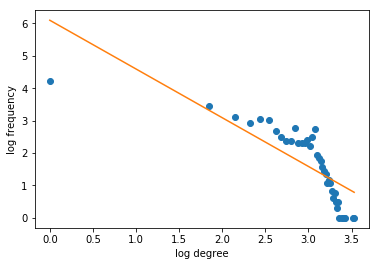

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(logx, logy, 'o', logx, line)
plt.xlabel('log degree')
plt.ylabel('log frequency')

In [17]:
# a glance at the old data
gold_anno = pd.read_pickle('/home/hermuba/data0118/goldstandard/node_anno_df')
pan = pd.read_csv('/home/hermuba/data0118/cdhit/clstr/pangenome_df/Escherichia0.70.clstr.csv', index_col = 0, header = 0)
count = pan.merge(gold_anno[['cluster', 'GO']], left_index = True, right_on = 'cluster').drop(columns = ['GO', 'cluster'], axis = 1).sum(axis = 1)
gold_anno['count'] = count
gold_anno['is_card']=gold_anno['card'].notnull()
gold_anno.loc[gold_anno.loc[gold_anno['count'] >1500].index, 'core'] = True
gold_anno['core'] = gold_anno['core'].fillna(False)
gold_anno['is_card'] = gold_anno['is_card'].fillna(False)

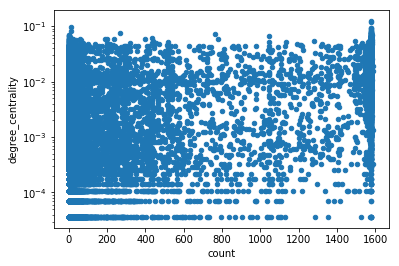

In [18]:
dc = nx.algorithms.centrality.degree_centrality(combined)
for k in dc.keys():
    gold_anno.loc[k ,'degree_centrality']  = dc[k]
gold_anno['degree_centrality'] = gold_anno['degree_centrality'].astype(float)
gold_anno.plot(kind='scatter', x = 'count', y='degree_centrality', logy=True)

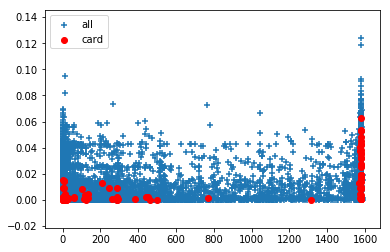

In [19]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.scatter(gold_anno['count'], gold_anno['degree_centrality'],marker = '+', label = 'all')
ax.scatter(gold_anno.loc[gold_anno['is_card']==1]['count'], gold_anno.loc[gold_anno['is_card']==1]['degree_centrality'], c='red', label = 'card')
#ax.set_yscale('log')
ax.legend()

# finding a lot more CARD genes

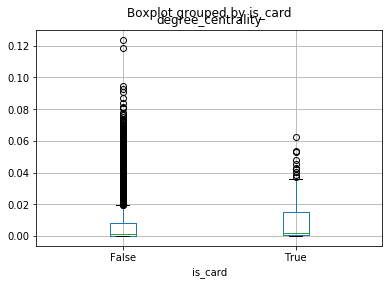

In [20]:
gold_anno.boxplot(by = 'is_card', column = 'degree_centrality')

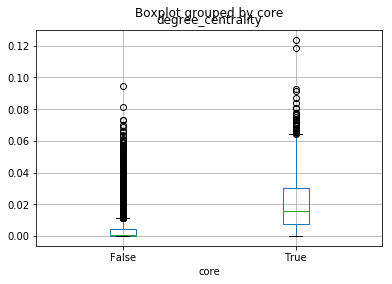

In [21]:
gold_anno.boxplot(by = 'core', column = 'degree_centrality')

In [22]:
nx.write_edgelist(combined, path + 'quad_combined')

In [21]:
nx.write_graphml(combined,path+'quad_combined.xml')

In [23]:
gold_anno.to_csv(path + 'gold_anno_quad.csv')

# Contributions from each net

In [45]:
v = {'None':0}
for edge in combined.edges:
    attr = combined.get_edge_data(edge[0], edge[1])
    try:
        del attr['weighted_mutual']
    except KeyError:
        pass
    if str(attr) not in v:
        v[str(attr)] = 1
    else:
        v[str(attr)] = v[str(attr)] +1
        

In [46]:
v

{'None': 0,
 "{'refseq': True}": 404602,
 "{'eskape': True}": 28169,
 "{'domain': True}": 1763908,
 "{'refseq': True, 'eskape': True}": 16362,
 "{'refseq': True, 'eskape': True, 'domain': True}": 2994,
 "{'refseq': True, 'domain': True}": 11416,
 "{'refseq': True, 'string': True}": 42000,
 "{'refseq': True, 'eskape': True, 'string': True}": 917,
 "{'eskape': True, 'string': True}": 988,
 "{'string': True}": 380504,
 "{'refseq': True, 'string': True, 'domain': True}": 321,
 "{'string': True, 'domain': True}": 35753,
 "{'refseq': True, 'eskape': True, 'string': True, 'domain': True}": 15,
 "{'eskape': True, 'domain': True}": 1379,
 "{'eskape': True, 'string': True, 'domain': True}": 462}

In [47]:
string.number_of_edges()

460960

In [49]:
refseq_net.number_of_edges()

478627

In [50]:
eskape_net.number_of_edges()

51286

In [52]:
domain.number_of_edges()

1816248

In [55]:
%matplotlib inline
import sys
sys.path.append('/home/hermuba/pyvenn')
import venn

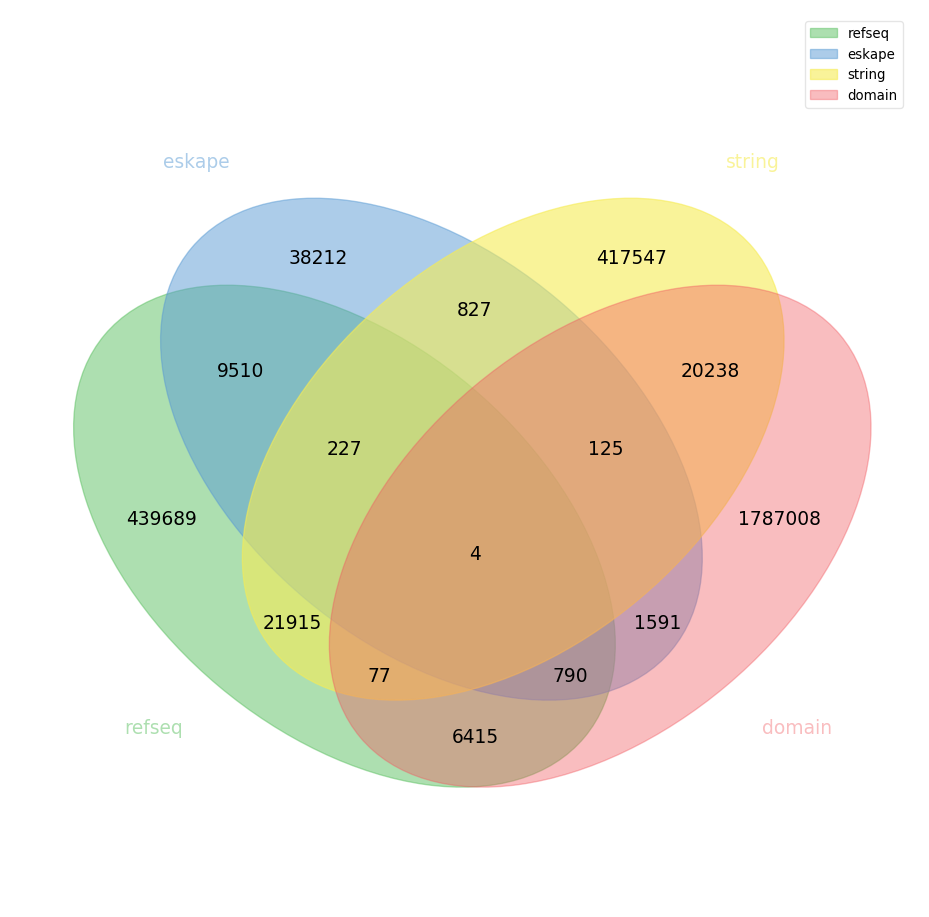

In [57]:
labels = venn.get_labels([refseq_net.edges, eskape_net.edges, string.edges, domain.edges], fill=['number'])
fig, ax = venn.venn4(labels, names=['refseq', 'eskape', 'string', 'domain'])
fig.show()

# Architecture

most connected node degree  262


Text(0, 0.5, 'log frequency')

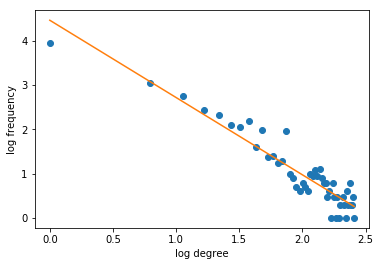

In [62]:
logx, logy, line, slope, r_value, p_value = power_law(eskape_net)
plt.plot(logx, logy, 'o', logx, line)
plt.xlabel('log degree')
plt.ylabel('log frequency')

most connected node degree  1209


Text(0, 0.5, 'log frequency')

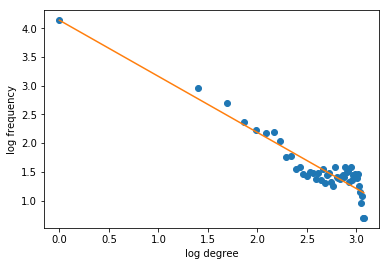

In [63]:
logx, logy, line, slope, r_value, p_value = power_law(refseq_net)
plt.plot(logx, logy, 'o', logx, line)
plt.xlabel('log degree')
plt.ylabel('log frequency')

most connected node degree  1669


Text(0, 0.5, 'log frequency')

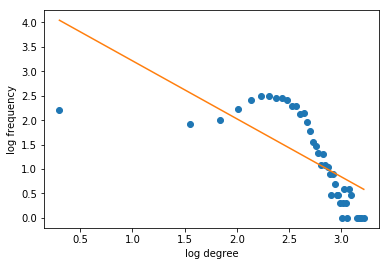

In [64]:
logx, logy, line, slope, r_value, p_value = power_law(string)
plt.plot(logx, logy, 'o', logx, line)
plt.xlabel('log degree')
plt.ylabel('log frequency')

most connected node degree  3309


Text(0, 0.5, 'log frequency')

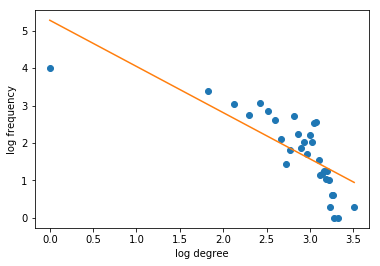

In [65]:
logx, logy, line, slope, r_value, p_value = power_law(domain)
plt.plot(logx, logy, 'o', logx, line)
plt.xlabel('log degree')
plt.ylabel('log frequency')

# Investigate components

In [66]:
graphs = list(nx.connected_component_subgraphs(combined))

In [68]:
node_no = [g.number_of_nodes() for g in graphs]

Text(0, 0.5, 'log No. of components')

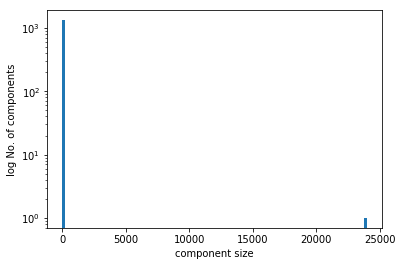

In [75]:
plt.hist(node_no, bins = 100, log = True)
plt.xlabel('component size')
plt.ylabel('log No. of components')

In [87]:
# filter network with degree in order to visualize
deg = combined.degree()

In [105]:
d = [n[0] for n in list(deg) if n[1]>20]

In [108]:
sub = combined.subgraph(d)

In [109]:
nx.write_graphml(sub,path+'sub_quad_combined.xml')

In [125]:
# network stats comparing them
def net_stat(G):
    return([G.number_of_nodes(), G.number_of_edges(), nx.algorithms.components.number_connected_components(G)])

In [131]:
df = pd.DataFrame(columns = ['no_nodes', 'no_edges', 'no_components'], index = ['refseq', 'eskape', 'string','domain', 'pangenomeNet'])
i = 0
for net in [refseq_net, eskape_net, string, domain, combined]:
    
    df.iloc[i] = net_stat(net)
    i+=1

In [133]:
df.to_csv('/home/hermuba/data0118/netstat')

''